## PlastiCC Light Curve Periodicity Analysis
---
Author: Anastasios (Andy) Tzanidakis, Eric Bellm \
University of Washington \
**Notebook status**: WIP

In [1]:
import numpy as np
from astropy.io import ascii
import os 
from tqdm import tqdm
from astropy.time import Time
import pandas as pd
import warnings
import time
import random
from gatspy import periodic, datasets
import matplotlib.pyplot as plt
from astropy.table import Table
from gatspy import datasets, periodic

import scipy.stats as sci_stat
import sys

%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 250
rcParams['font.size'] = 20

In [2]:
# Helper functions
def comp(pinj, prec, thresh=0.25, pfact=1):
    """Compute completeness"""    
    try:
        ratio = (pfact*prec)/pinj

        # remove nans 
        ratio = ratio[~np.isnan(ratio)]

        select = np.where((ratio>=1-1*thresh) & (ratio<=1+1*thresh))
        ratio_select = ratio[select]

        return len(ratio_select)/len(ratio)
    except:
        return 0

def fail_rate(p0):
    """Calculate the fail rate: Fail/Total"""
    try:
        N_total = len(p0)
        N_rej = len(p0[np.isnan(p0)])
        return N_rej/N_total
    except:
        return 0

def pass_rate(p0):
    """Calculate the pass rate: Fail/Total"""
    try:
        N_total = len(p0)
        N_rej = len(p0[~np.isnan(p0)])
        return N_rej/N_total
    except:
        return 0

## RR Lyrae

Text(0, 0.5, 'log $p_{rec}$ [days]')

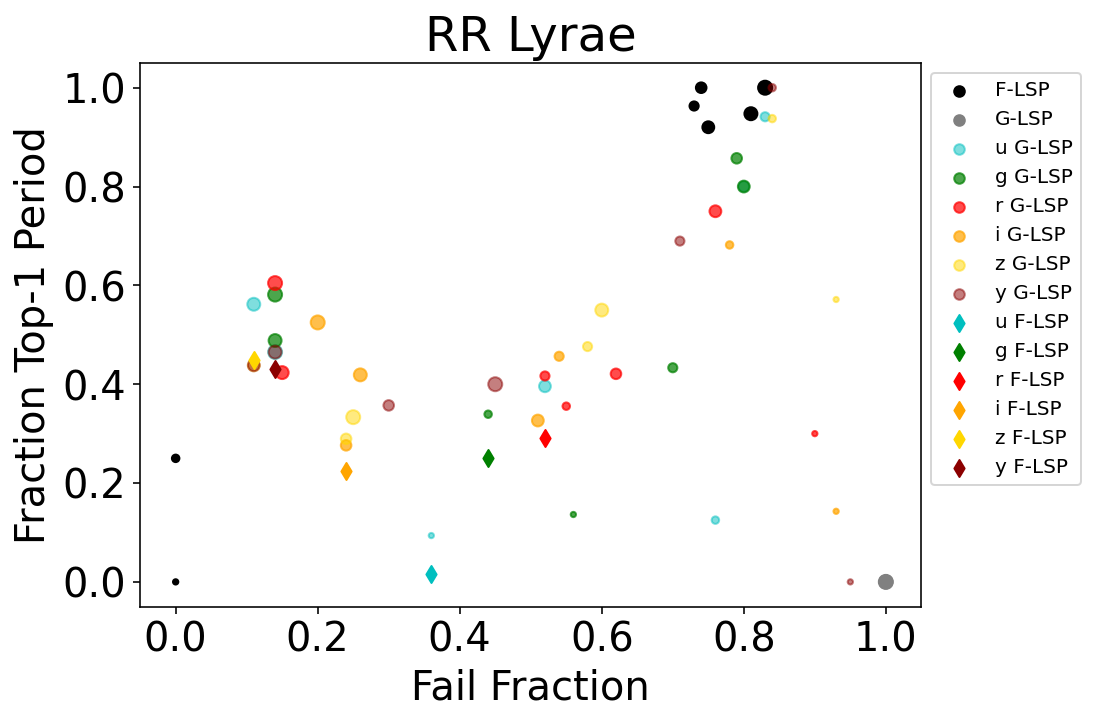

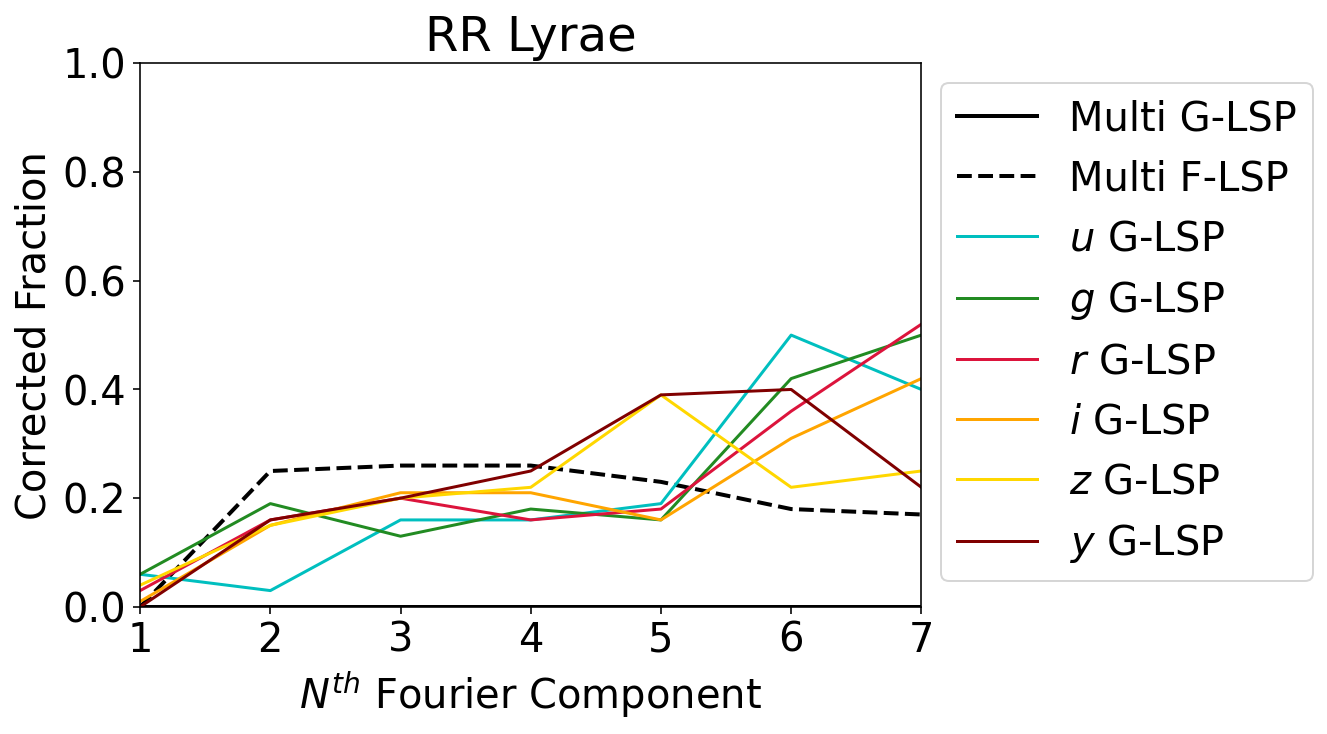

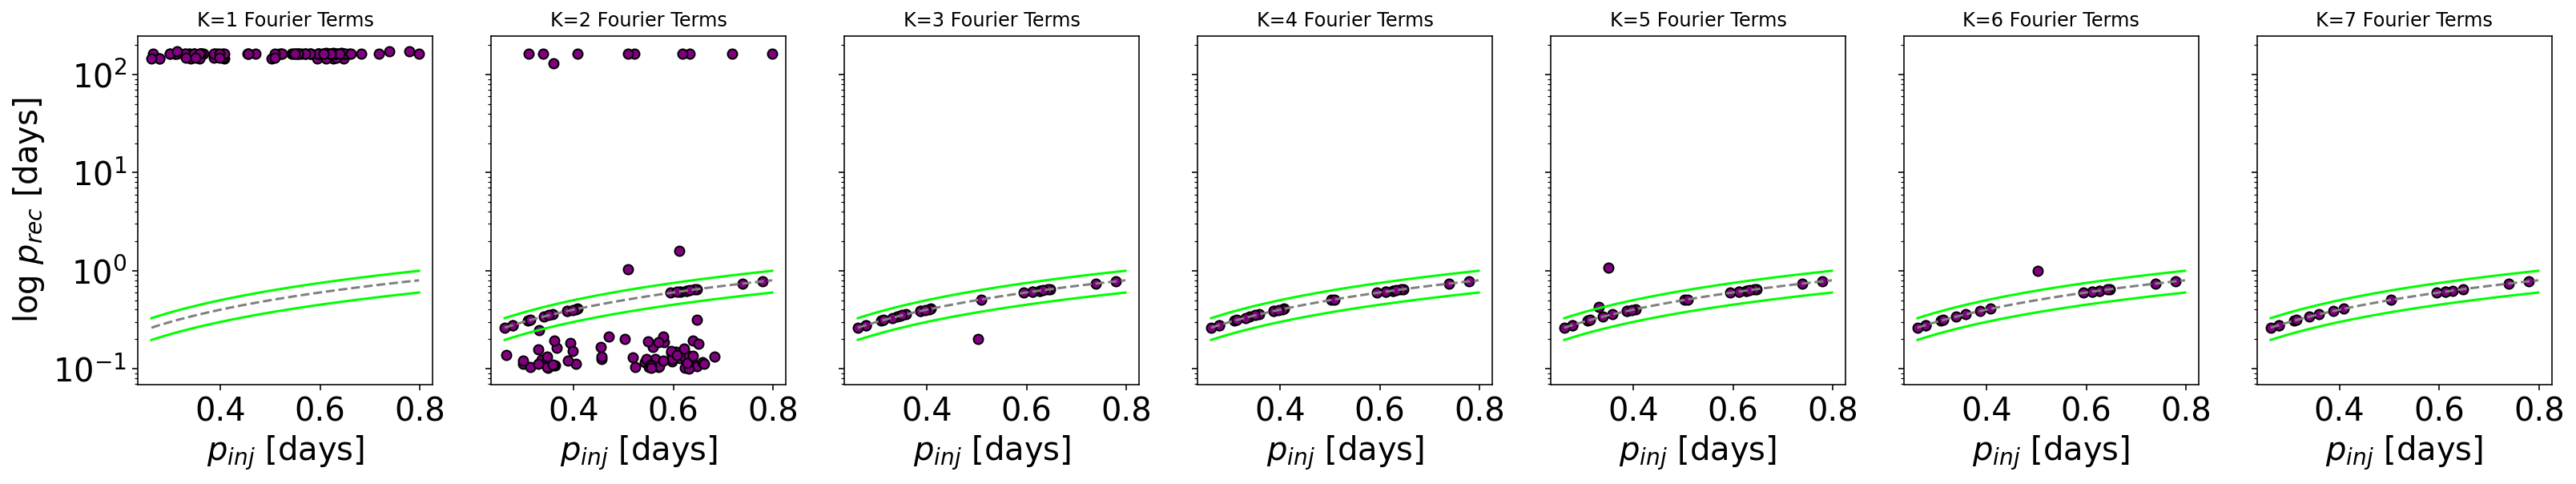

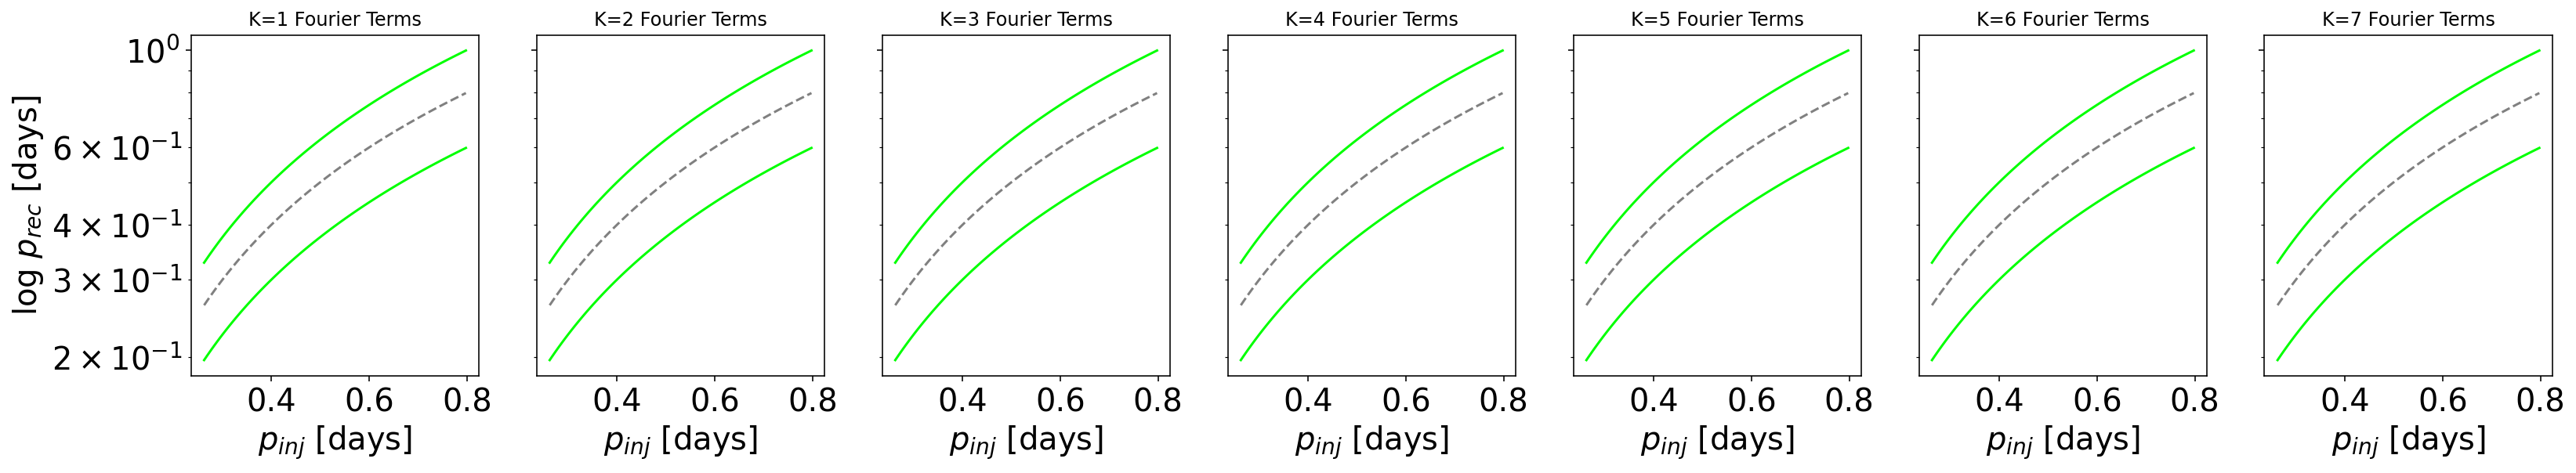

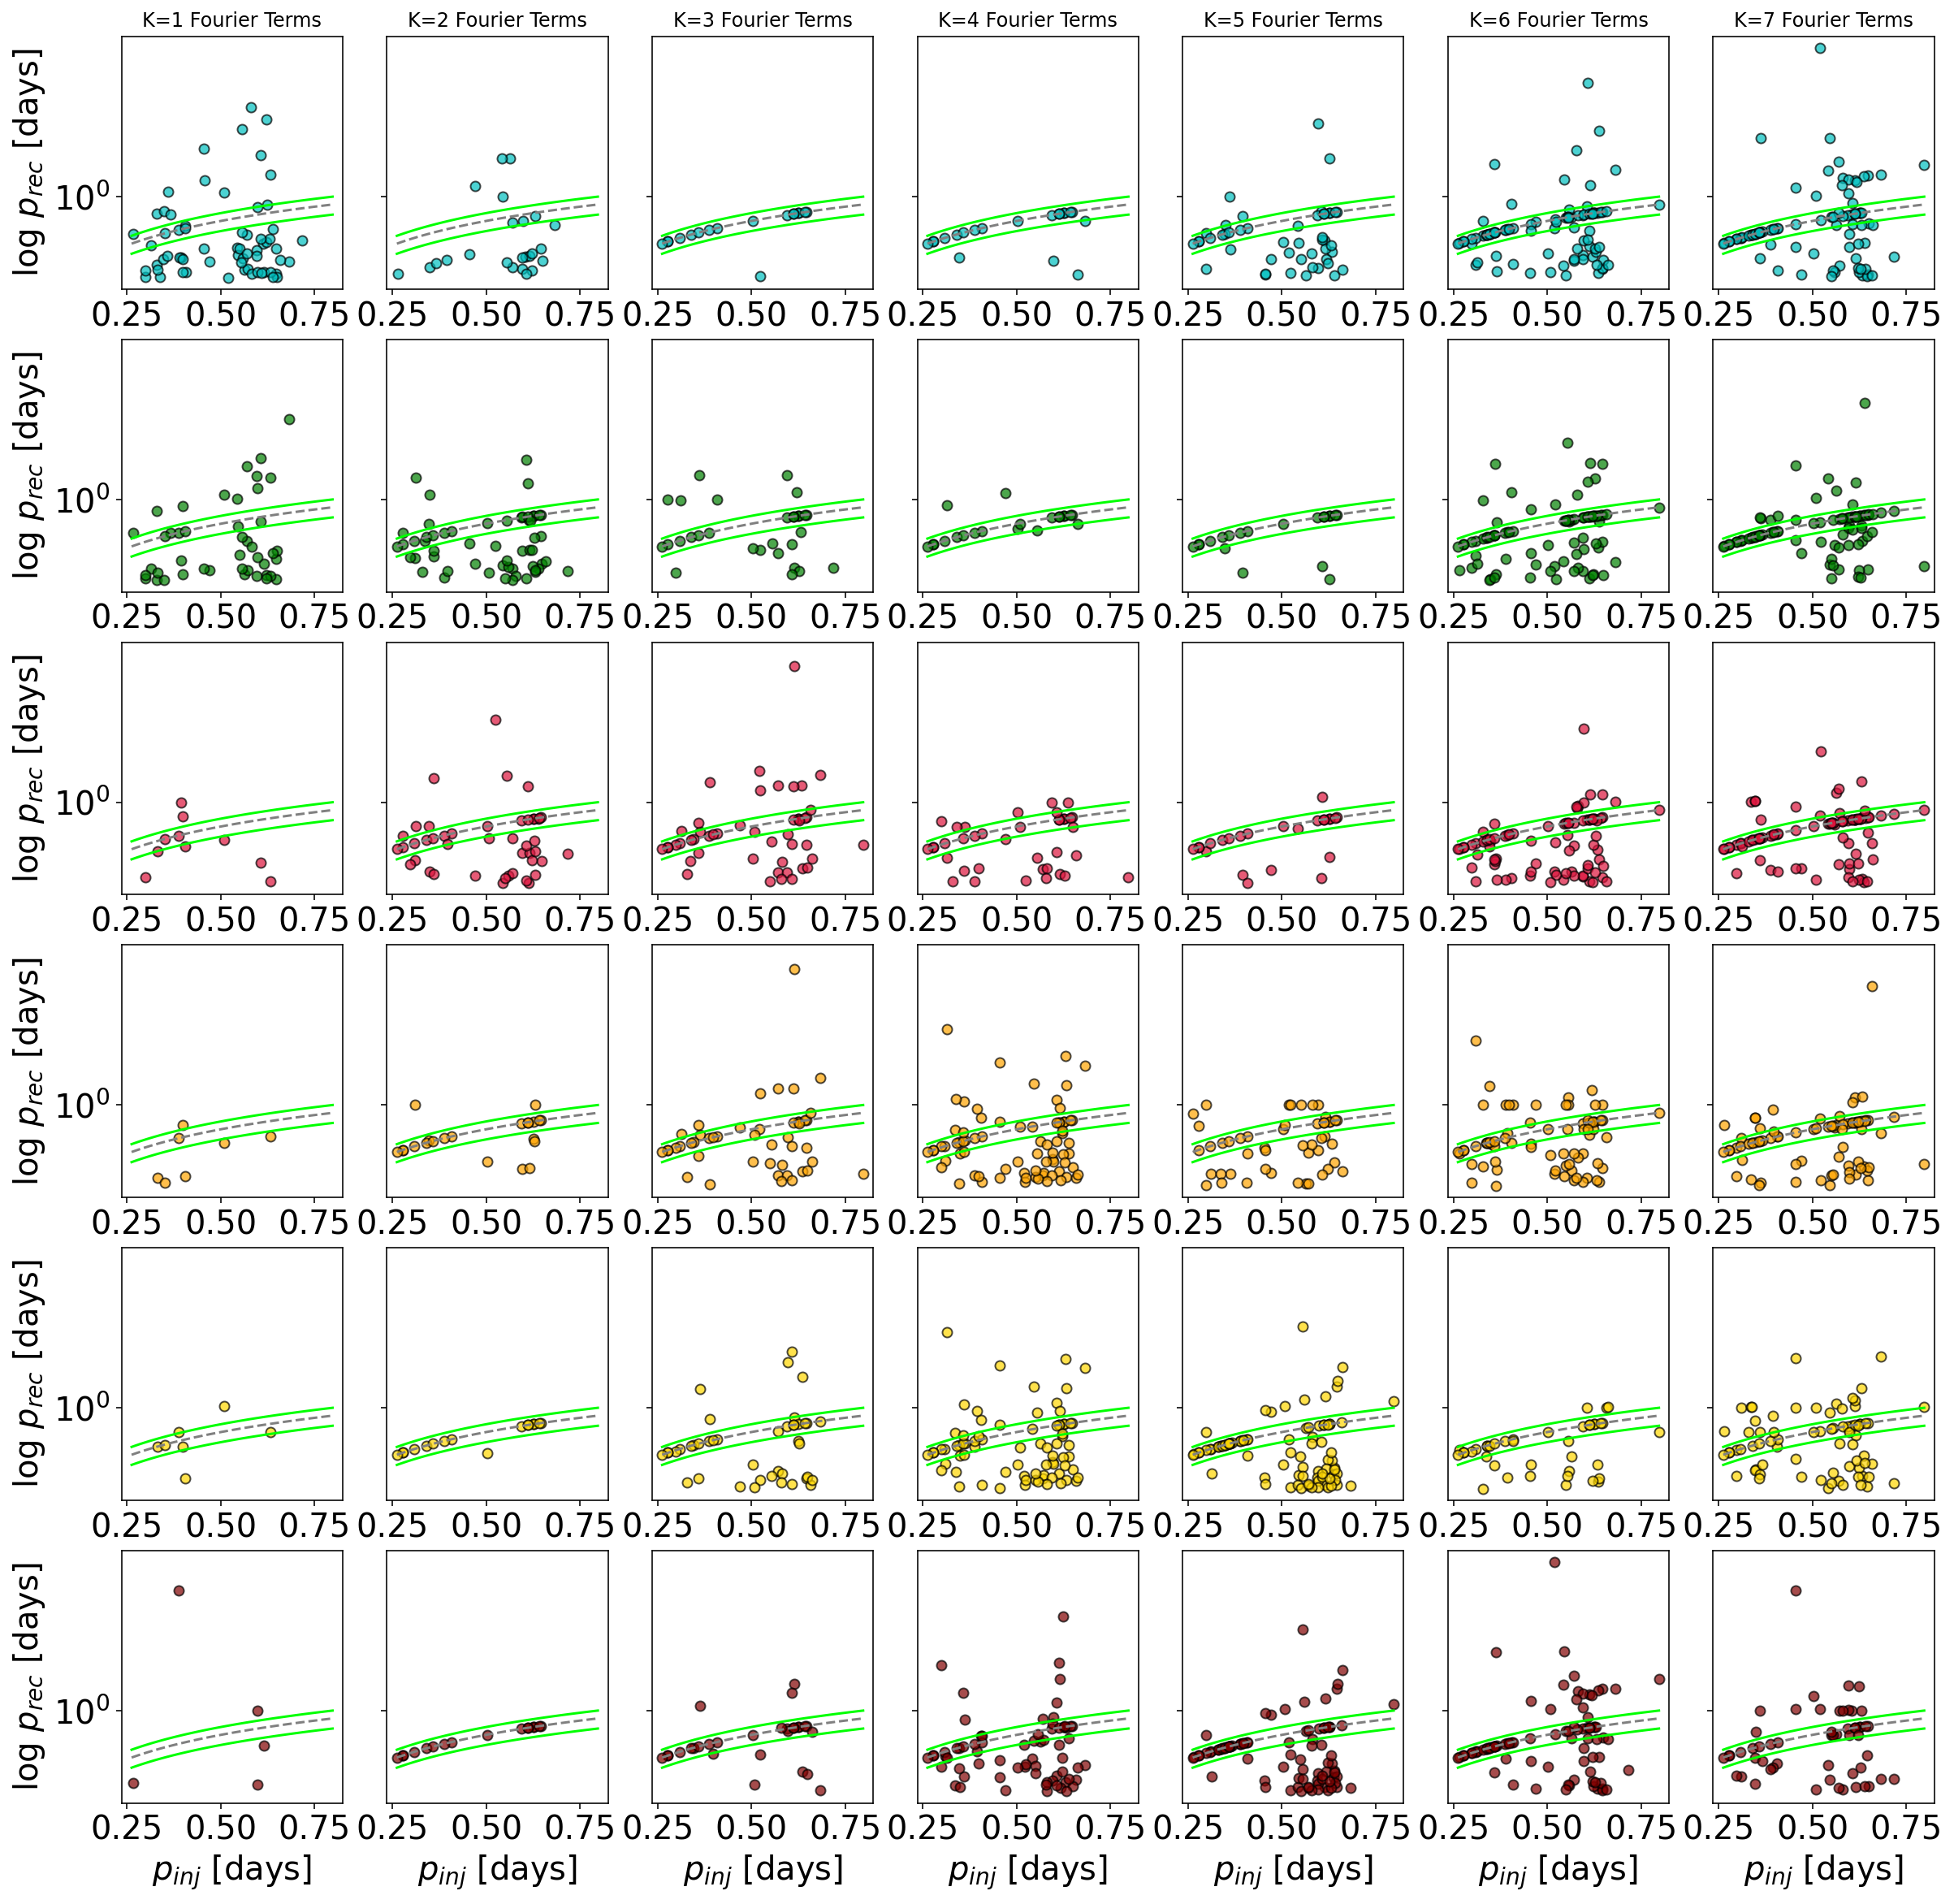

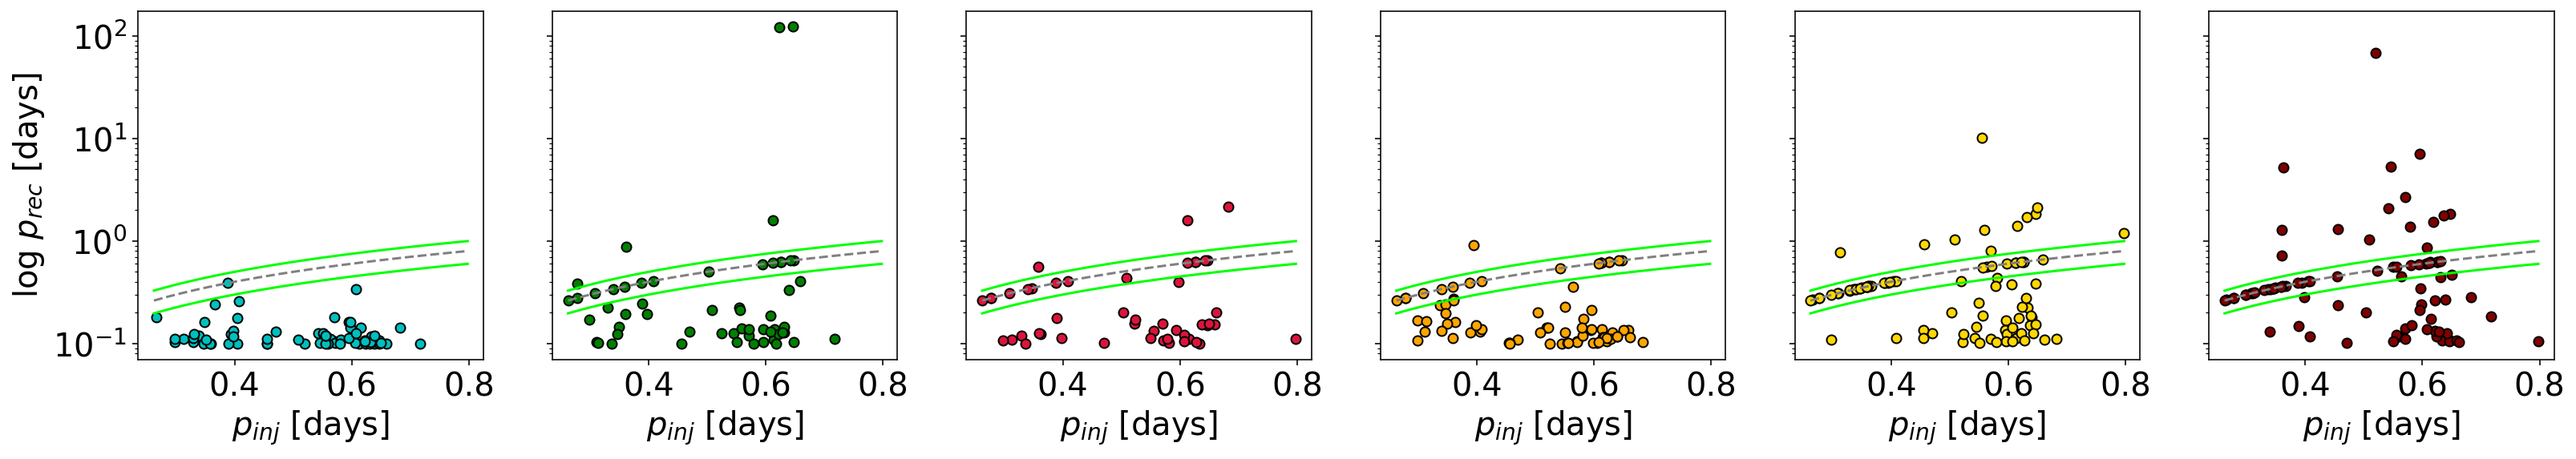

In [3]:
#table1 = ascii.read('../data/lsp_results/rrl_master_N100_nmod')
table1 = ascii.read('../data/rrl_master_N100_2022_3_25_10')


# FAILURE NUMBERS
mmf = [fail_rate(table1[f'multi_lsp_f{i}']) for i in range(1,8)]
mmg = [fail_rate(table1[f'multi_lsp_g{i}']) for i in range(1,8)]
su_u1 = [fail_rate(table1[f's_lsp_g{i}_u']) for i in range(1,8)]
su_g1 = [fail_rate(table1[f's_lsp_g{i}_g']) for i in range(1,8)]
su_r1 = [fail_rate(table1[f's_lsp_g{i}_r']) for i in range(1,8)]
su_i1 = [fail_rate(table1[f's_lsp_g{i}_i']) for i in range(1,8)]
su_z1 = [fail_rate(table1[f's_lsp_g{i}_z']) for i in range(1,8)]
su_y1 = [fail_rate(table1[f's_lsp_g{i}_y']) for i in range(1,8)]

fu = fail_rate(table1[f's_lsp_f_u'])
fg = fail_rate(table1[f's_lsp_f_g'])
fr = fail_rate(table1[f's_lsp_f_r'])
fi = fail_rate(table1[f's_lsp_f_i'])
fz = fail_rate(table1[f's_lsp_f_z'])
fy = fail_rate(table1[f's_lsp_f_y'])

# Completeness NUNMERS!
mc1 = [comp(table1['ptrue'],table1[f'multi_lsp_f{i}'], thresh=0.25) for i in range(1,8)]
mc2 = [comp(table1['ptrue'],table1[f'multi_lsp_g{i}'], thresh=0.25) for i in range(1,8)]
smcu = [comp(table1['ptrue'], table1[f's_lsp_g{i}_u'], thresh=0.25) for i in range(1,8)]
smcg = [comp(table1['ptrue'], table1[f's_lsp_g{i}_g'], thresh=0.25) for i in range(1,8)]
smcr = [comp(table1['ptrue'], table1[f's_lsp_g{i}_r'], thresh=0.25) for i in range(1,8)]
smci = [comp(table1['ptrue'], table1[f's_lsp_g{i}_i'], thresh=0.25) for i in range(1,8)]
smcz = [comp(table1['ptrue'], table1[f's_lsp_g{i}_z'], thresh=0.25) for i in range(1,8)]
smcy = [comp(table1['ptrue'], table1[f's_lsp_g{i}_y'], thresh=0.25) for i in range(1,8)]

sfu = comp(table1['ptrue'], table1[f's_lsp_f_u'], thresh=0.25)
sfg = comp(table1['ptrue'], table1[f's_lsp_f_g'], thresh=0.25)
sfr = comp(table1['ptrue'], table1[f's_lsp_f_r'], thresh=0.25)
sfi = comp(table1['ptrue'], table1[f's_lsp_f_i'], thresh=0.25)
sfz = comp(table1['ptrue'], table1[f's_lsp_f_z'], thresh=0.25)
sfy = comp(table1['ptrue'], table1[f's_lsp_f_y'], thresh=0.25)



plt.figure(figsize=(7,5))
plt.scatter(mmf, mc1, color='k', s=7*np.arange(1,8), label='F-LSP')
plt.scatter(mmg, mc2, color='gray', s=7*np.arange(1,8), label='G-LSP')
plt.scatter(su_u1, smcu, color='c', alpha=0.5, s=7*np.arange(1,8), label='u G-LSP')
plt.scatter(su_g1, smcg, color='green', alpha=0.7, s=7*np.arange(1,8), label='g G-LSP')
plt.scatter(su_r1, smcr, color='red', alpha=0.7, s=7*np.arange(1,8), label='r G-LSP')
plt.scatter(su_i1, smci, color='orange', alpha=0.7, s=7*np.arange(1,8), label='i G-LSP')
plt.scatter(su_z1, smcz, color='gold', alpha=0.5, s=7*np.arange(1,8), label='z G-LSP')
plt.scatter(su_y1, smcy, color='darkred', alpha=0.5, s=7*np.arange(1,8), label='y G-LSP')


plt.scatter(fu, sfu, color='c', marker='d', label='u F-LSP')
plt.scatter(fg, sfg, color='green', marker='d', label='g F-LSP')
plt.scatter(fr, sfr, color='red', marker='d', label='r F-LSP')
plt.scatter(fi, sfi, color='orange', marker='d', label='i F-LSP')
plt.scatter(fz, sfz, color='gold', marker='d', label='z F-LSP')
plt.scatter(fy, sfy, color='darkred', marker='d', label='y F-LSP')

plt.ylabel("Fraction Top-1 Period")
plt.xlabel("Fail Fraction")
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.title("RR Lyrae")



#### MULTI BAND #### 
comp_multi_f = np.array([comp(table1['ptrue'], table1[f'multi_lsp_f{i}']) for i in range(1,8)])
fail_multi_f = np.array([fail_rate(table1[f'multi_lsp_f{i}']) for i in range(1,8)])
pass_multi_f = np.array([pass_rate(table1[f'multi_lsp_f{i}']) for i in range(1,8)])

comp_multi_g = np.array([comp(table1['ptrue'], table1[f'multi_lsp_g{i}']) for i in range(1,8)])
fail_multi_g = np.array([fail_rate(table1[f'multi_lsp_g{i}']) for i in range(1,8)])
pass_multi_g = np.array([pass_rate(table1[f'multi_lsp_g{i}']) for i in range(1,8)])


#### SINGLE BAND #### 
comp_su = [comp(table1['ptrue'], table1[f's_lsp_g{i}_u']) for i in range(1,8)]
fail_su = np.array([fail_rate(table1[f's_lsp_g{i}_u']) for i in range(1,8)])
pass_su = np.array([pass_rate(table1[f's_lsp_g{i}_u']) for i in range(1,8)])

comp_sg = [comp(table1['ptrue'], table1[f's_lsp_g{i}_g']) for i in range(1,8)]
fail_sg = np.array([fail_rate(table1[f's_lsp_g{i}_g']) for i in range(1,8)])
pass_sg = np.array([pass_rate(table1[f's_lsp_g{i}_g']) for i in range(1,8)])

comp_sr = np.array([comp(table1['ptrue'], table1[f's_lsp_g{i}_r']) for i in range(1,8)])
fail_sr = np.array([fail_rate(table1[f's_lsp_g{i}_r']) for i in range(1,8)])
pass_sr = np.array([pass_rate(table1[f's_lsp_g{i}_r']) for i in range(1,8)])

comp_si = [comp(table1['ptrue'], table1[f's_lsp_g{i}_i']) for i in range(1,8)]
fail_si = np.array([fail_rate(table1[f's_lsp_g{i}_i']) for i in range(1,8)])
pass_si = np.array([pass_rate(table1[f's_lsp_g{i}_i']) for i in range(1,8)])

comp_sz = [comp(table1['ptrue'], table1[f's_lsp_g{i}_z']) for i in range(1,8)]
fail_sz = np.array([fail_rate(table1[f's_lsp_g{i}_z']) for i in range(1,8)])
pass_sz = np.array([pass_rate(table1[f's_lsp_g{i}_z']) for i in range(1,8)])

comp_sy = np.array([comp(table1['ptrue'], table1[f's_lsp_g{i}_y']) for i in range(1,8)])
fail_sy = np.array([fail_rate(table1[f's_lsp_g{i}_y']) for i in range(1,8)])
pass_sy = np.array([pass_rate(table1[f's_lsp_g{i}_y']) for i in range(1,8)])

#### SINGLE FAST ##### 
comp_Fu = comp(table1['ptrue'], table1[f's_lsp_f_u'])
fail_Fu = fail_rate(table1[f's_lsp_f_u'])
pass_Fu = pass_rate(table1[f's_lsp_f_u'])

comp_Fg = comp(table1['ptrue'], table1[f's_lsp_f_g'])
fail_Fg = fail_rate(table1[f's_lsp_f_g'])
pass_Fg = pass_rate(table1[f's_lsp_f_g'])


plt.figure(figsize=(7,5))
plt.plot(range(1,8), comp_multi_g * (pass_multi_g/(pass_multi_g+fail_multi_g)),
        color='k', ls='-', lw=2, label="Multi G-LSP")
plt.plot(range(1,8), comp_multi_f * (pass_multi_f/(pass_multi_f+fail_multi_f)),
        color='k', ls='--', lw=2, label="Multi F-LSP")

plt.plot(range(1,8), comp_su * (pass_su/(pass_su+fail_su)), color='c',label="$u$ G-LSP")
plt.plot(range(1,8), comp_sg * (pass_sg/(pass_sg+fail_sg)), color='forestgreen',label="$g$ G-LSP")
plt.plot(range(1,8), comp_sr * (pass_sr/(pass_sr+fail_sr)), color='crimson',label="$r$ G-LSP")
plt.plot(range(1,8), comp_si * (pass_si/(pass_si+fail_si)), color='orange',label="$i$ G-LSP")
plt.plot(range(1,8), comp_sz * (pass_sz/(pass_sz+fail_sz)), color='gold',label="$z$ G-LSP")
plt.plot(range(1,8), comp_sy * (pass_sy/(pass_sy+fail_sy)), color='maroon',label="$y$ G-LSP")

#plt.ylabel("Fraction Top-1 Period")
plt.ylabel("Corrected Fraction")
plt.xlabel("$N^{th}$ Fourier Component")
plt.title("RR Lyrae")
plt.legend(bbox_to_anchor=(1,1))
plt.xlim(1, 7)
plt.ylim(0, 1)

def line(x, a, b):
    return a*x + b

xf = np.linspace(min(table1['ptrue']), max(table1['ptrue']), 100)

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(27,4), sharey=True)

j = 1
for jj in range(7):
    ax[jj].scatter(table1['ptrue'], table1[f'multi_lsp_f{j}'], marker="o",
              color='purple', edgecolor='k')
    ax[jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
    ax[jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
    ax[jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
    ax[jj].set_yscale('log')

    ax[jj].set_xlabel("$p_{inj}$ [days]")
    ax[jj].set_title(f"K={j} Fourier Terms", fontsize=12)
    j += 1
ax[0].set_ylabel("log $p_{rec}$ [days]")




fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(27,4), sharey=True)

j = 1
for jj in range(7):
    ax[jj].scatter(table1['ptrue'], table1[f'multi_lsp_g{j}'], marker="o",
              color='purple', edgecolor='k')
    ax[jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
    ax[jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
    ax[jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
    ax[jj].set_yscale('log')

    ax[jj].set_xlabel("$p_{inj}$ [days]")
    ax[jj].set_title(f"K={j} Fourier Terms", fontsize=12)
    j += 1
ax[0].set_ylabel("log $p_{rec}$ [days]")


fig, ax = plt.subplots(nrows=6, ncols=7, figsize=(20,20), sharey=True)

ll = ['u', 'g', 'r', 'i', 'z', 'y']
llc = ['c', 'g', 'crimson', 'orange', 'gold', 'maroon']
for l in range(6):
    j = 1
    for jj in range(7):
        ax[l,jj].scatter(table1['ptrue'], table1[f's_lsp_g{j}_{ll[l]}'], marker="o",
                  color=llc[l], alpha=0.7, edgecolor='k')
        ax[l,jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
        ax[l,jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
        ax[l,jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
        ax[l,jj].set_yscale('log')

        ax[l,jj].set_xlabel("$p_{inj}$ [days]")
        
        j += 1
    ax[l,0].set_ylabel("log $p_{rec}$ [days]")
 
for i in range(0, 7):
    ax[0,i].set_title(f"K={i+1} Fourier Terms", fontsize=12)
    
    
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(27,4), sharey=True)

j = 1
for jj in range(6):
    ax[jj].scatter(table1['ptrue'], table1[f's_lsp_f_{ll[jj]}'], marker="o",
              color=llc[jj], edgecolor='k')
    ax[jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
    ax[jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
    ax[jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
    ax[jj].set_yscale('log')

    ax[jj].set_xlabel("$p_{inj}$ [days]")
    j += 1
ax[0].set_ylabel("log $p_{rec}$ [days]")

## Eclipsing Binaries

Text(0, 0.5, 'log $p_{rec}$ [days]')

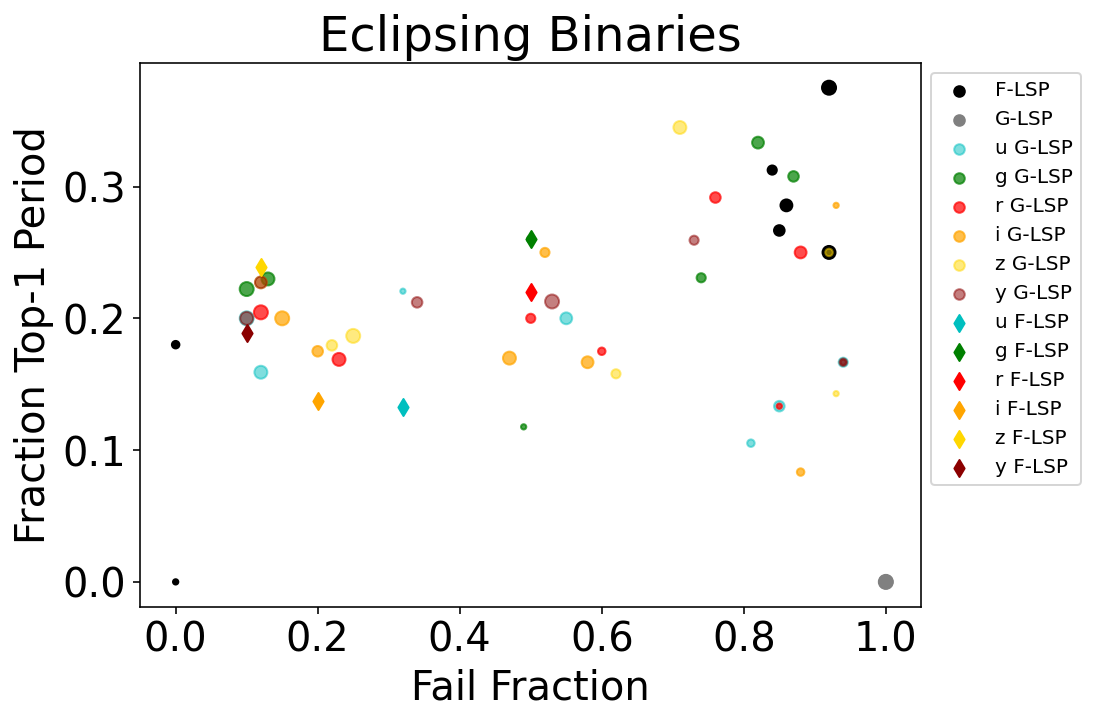

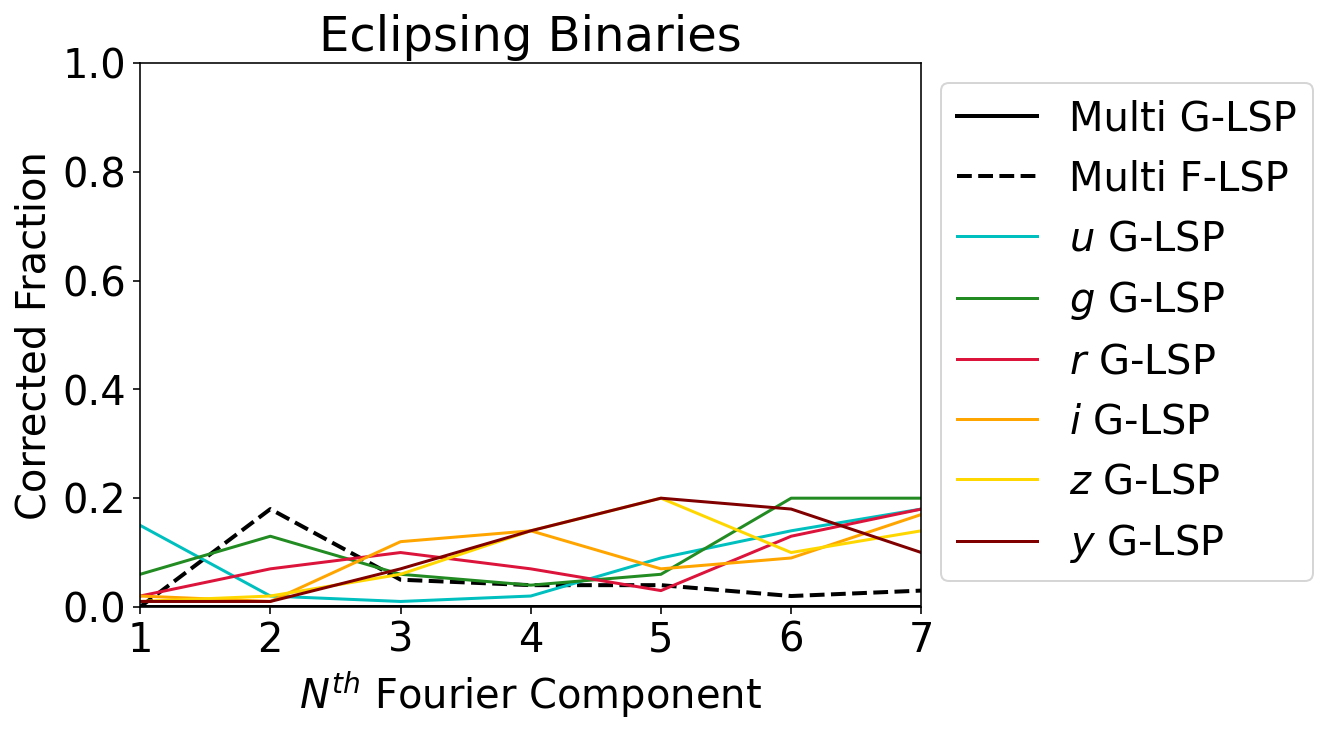

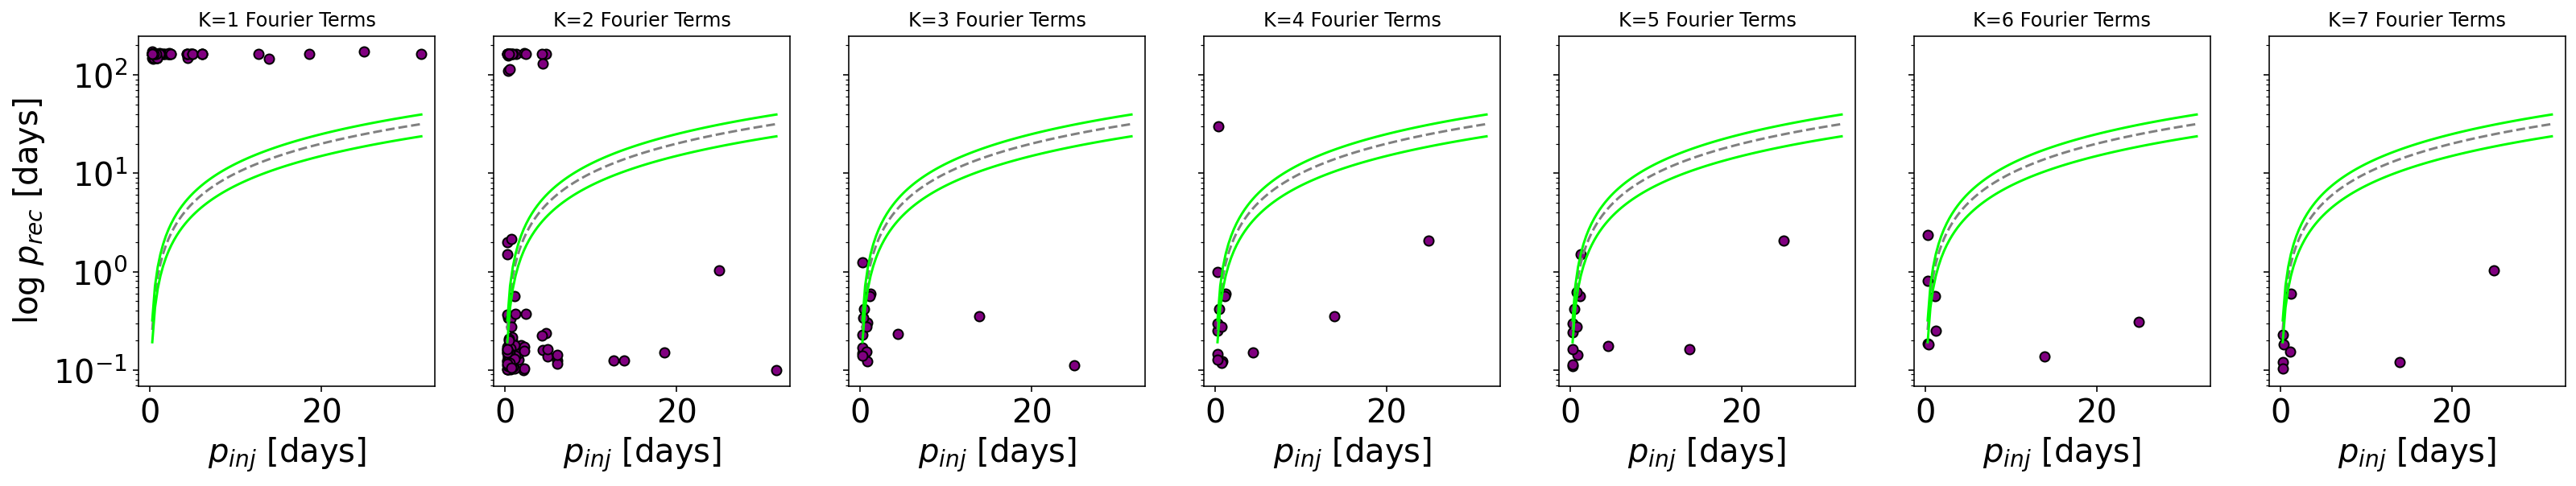

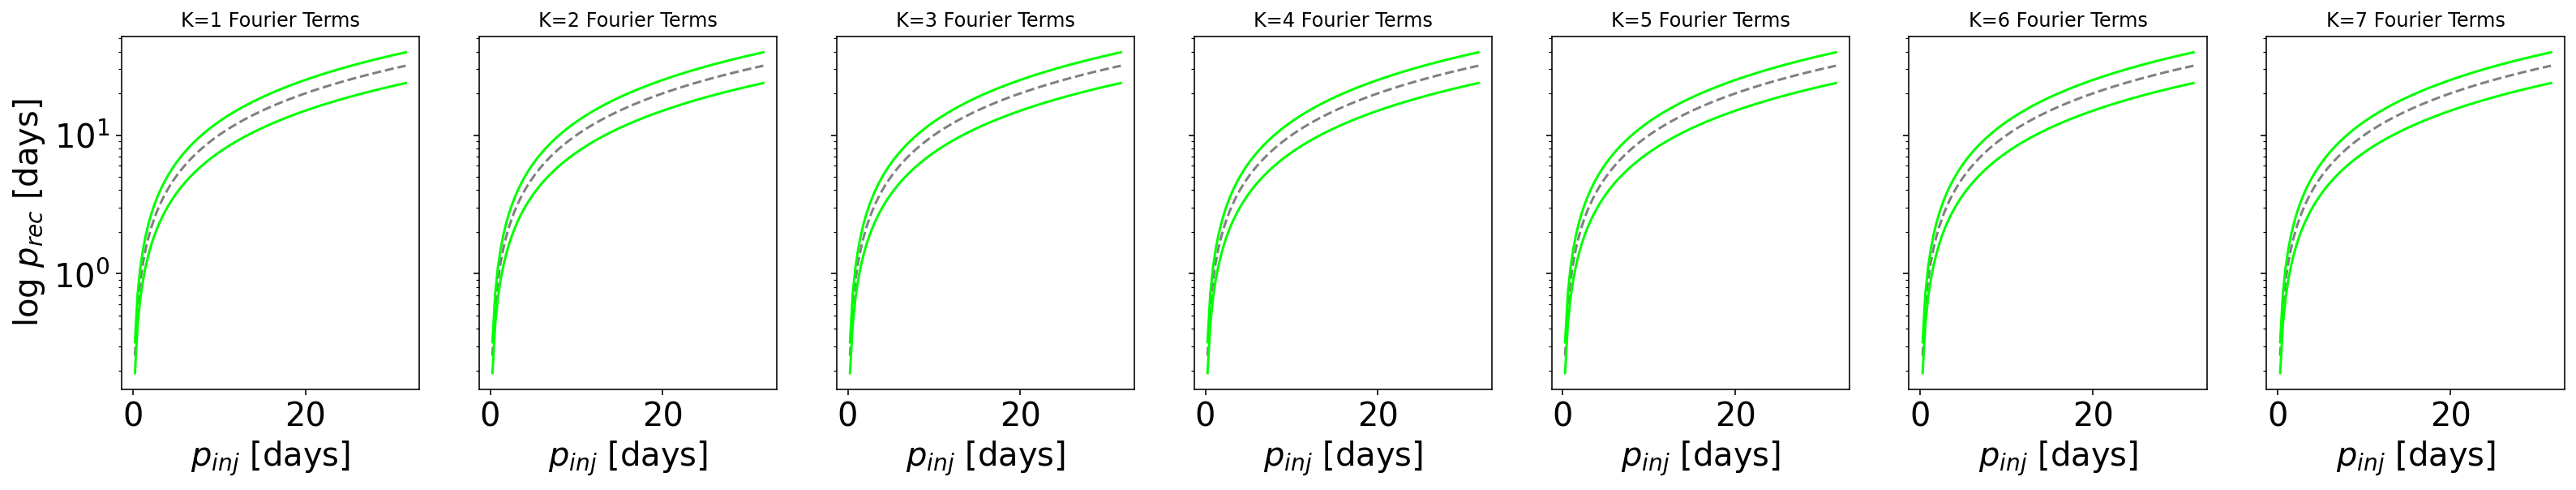

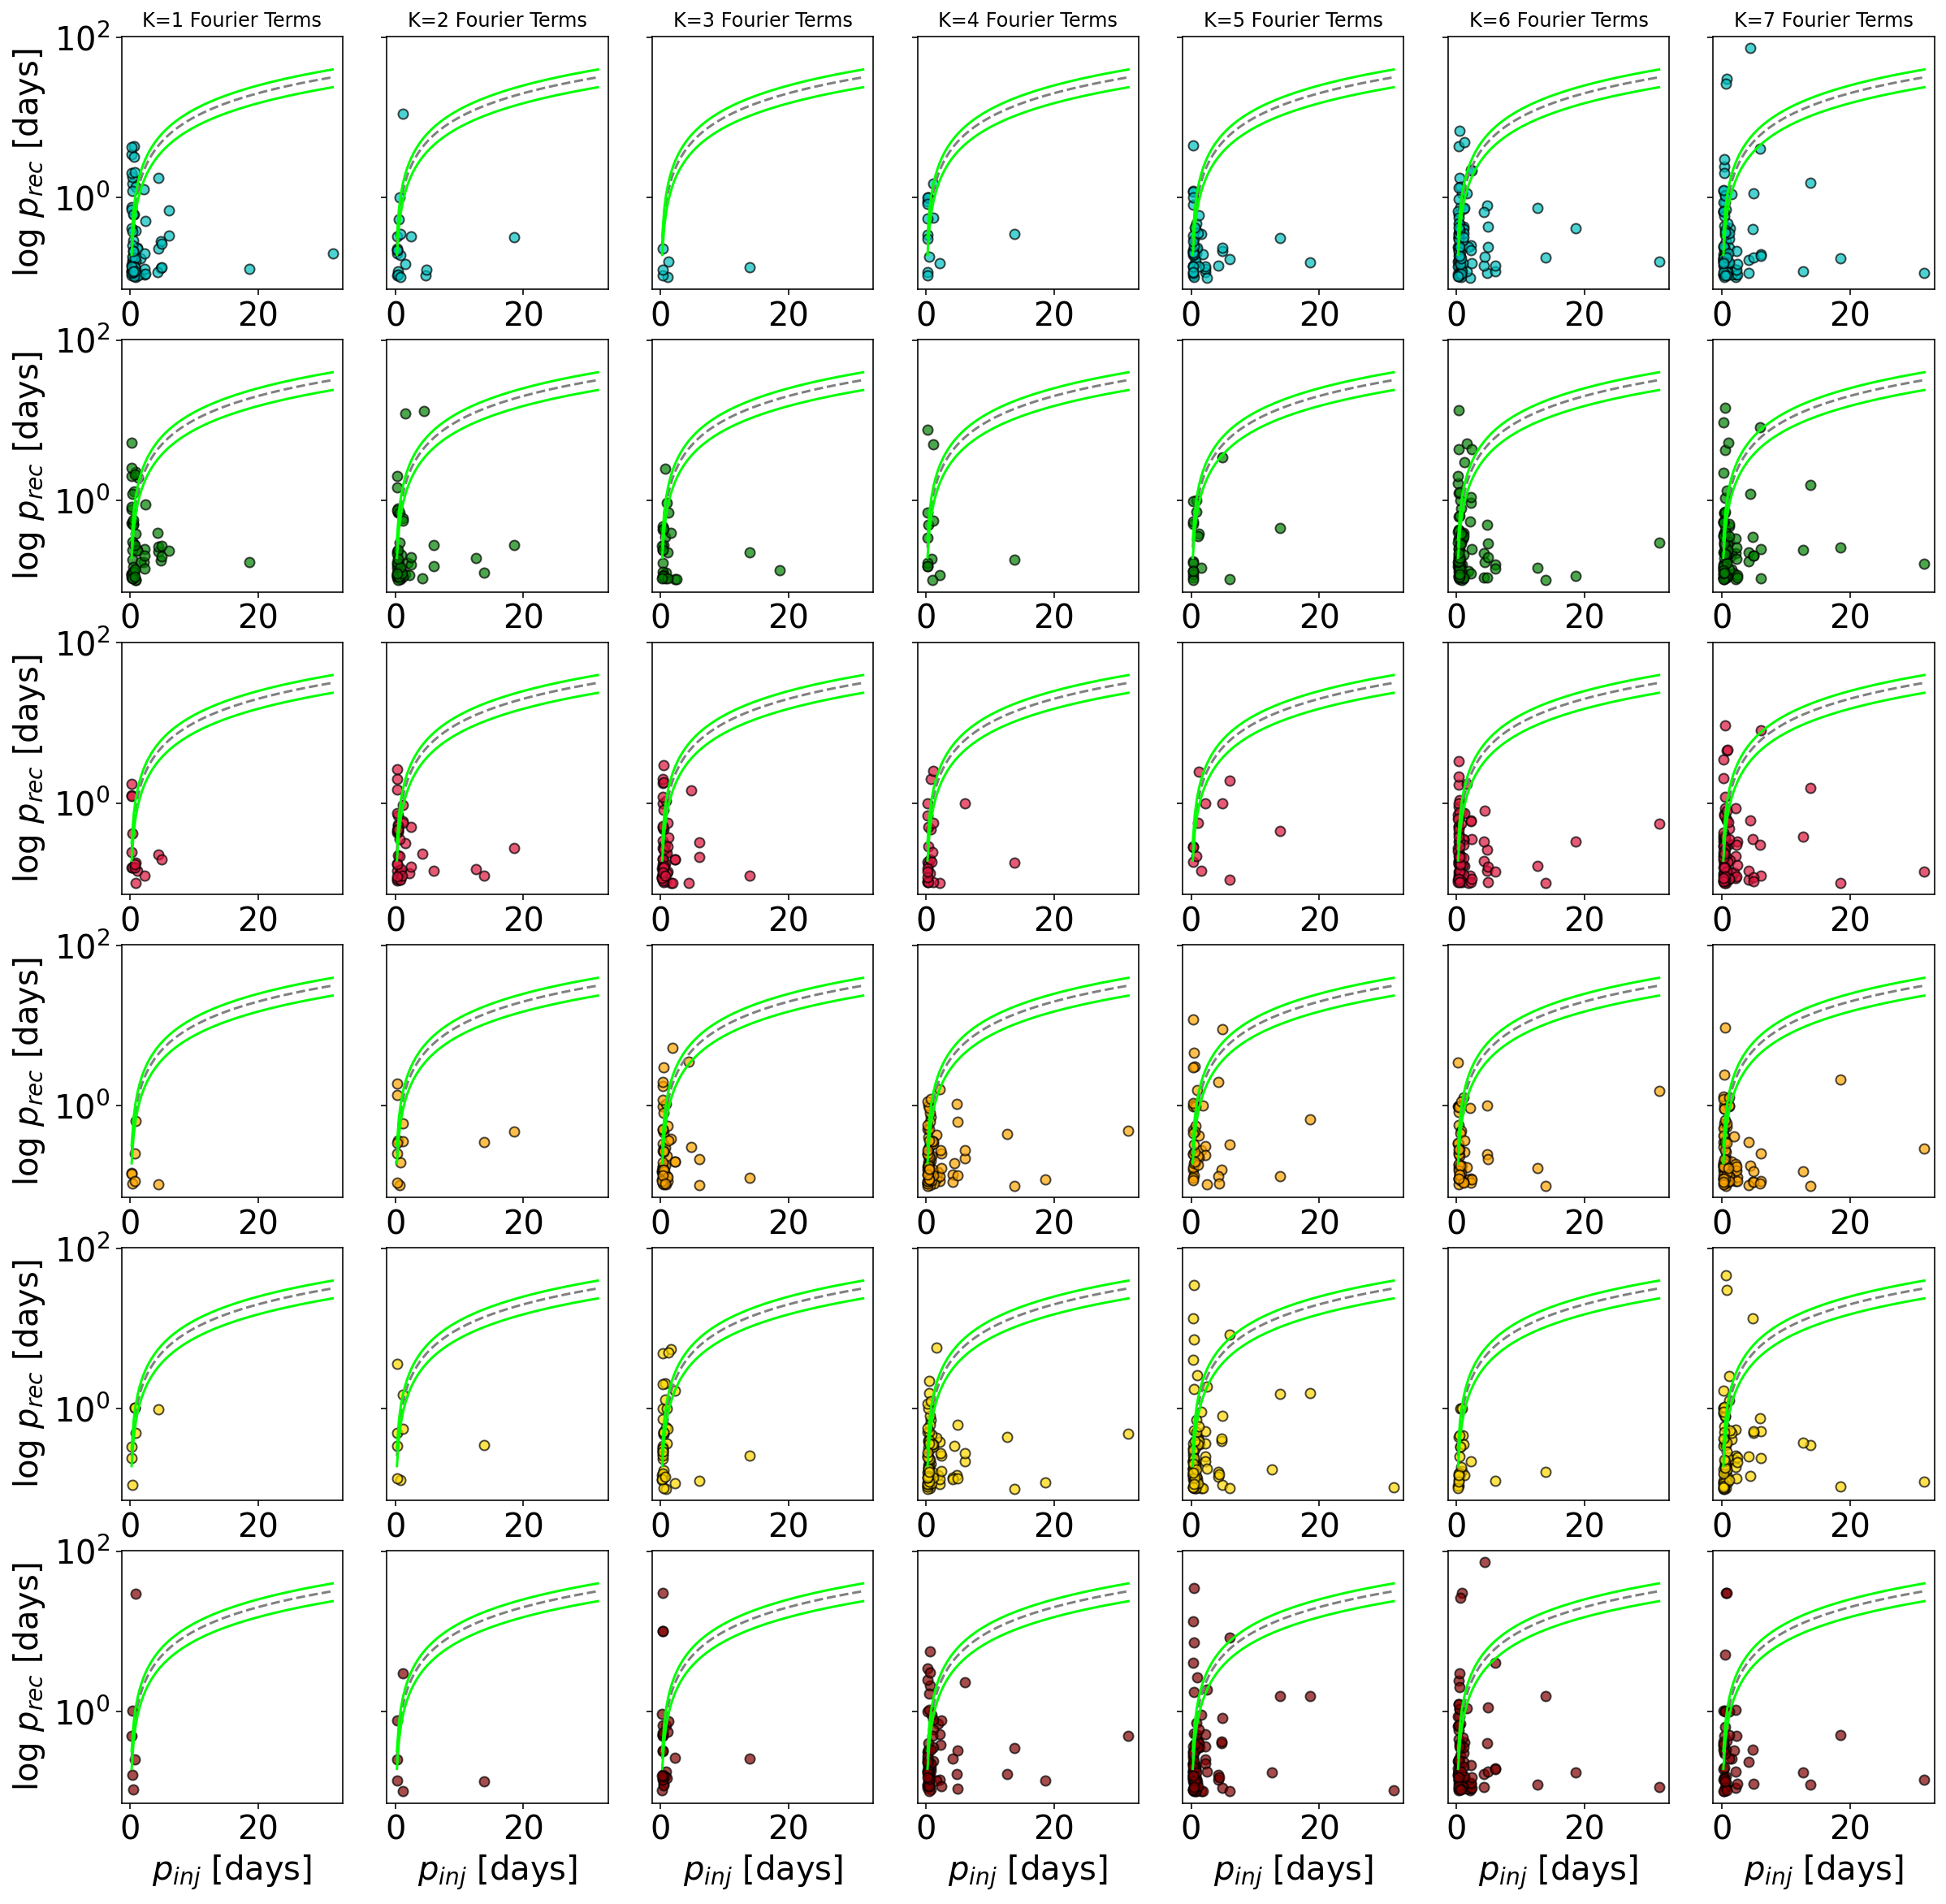

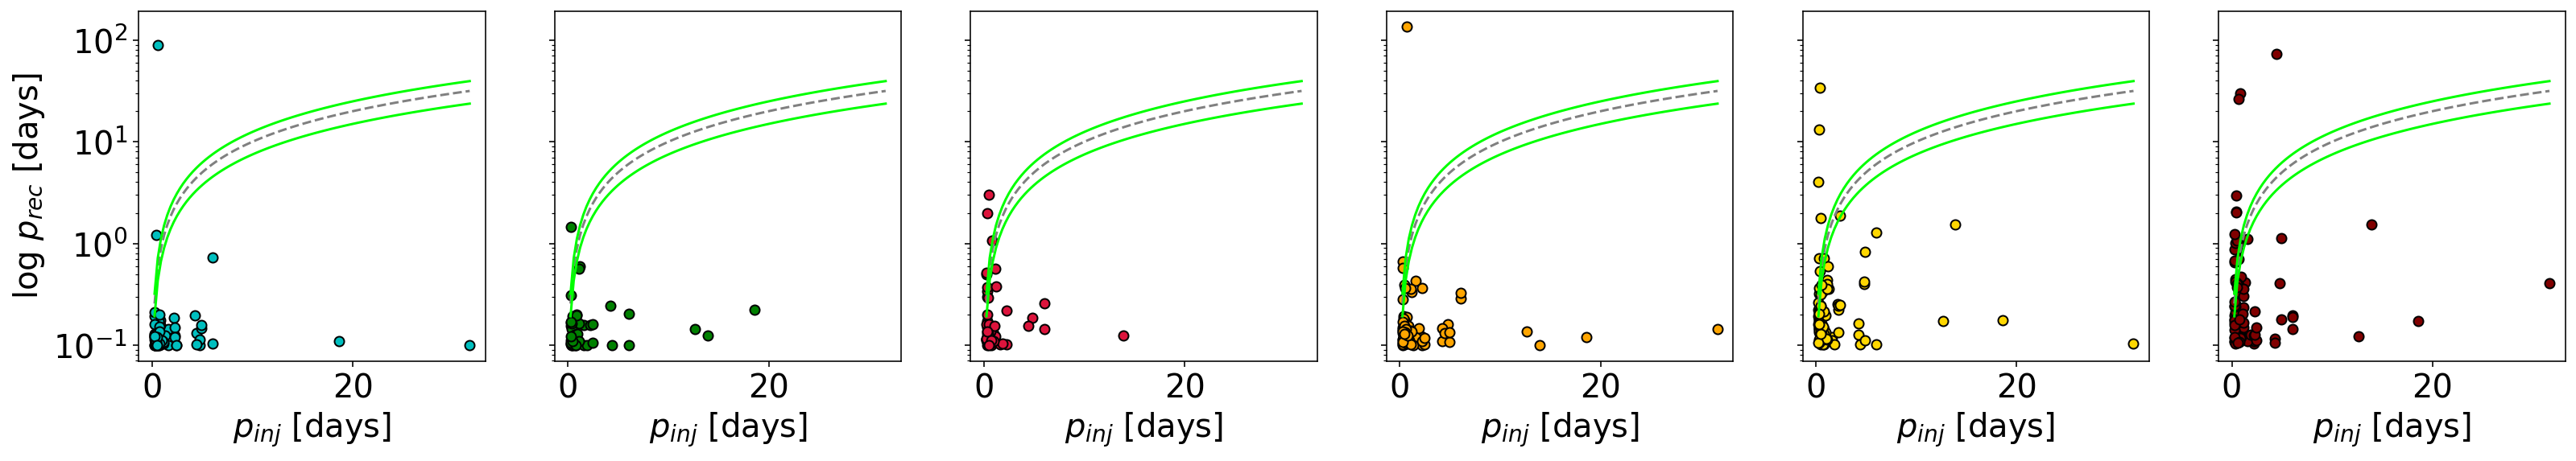

In [4]:
#table1 = ascii.read('../data/lsp_results/eb_master_N100_nmod')
table1 = ascii.read('../data/eb_master_N100_2022_3_25_4')

# FAILURE NUMBERS
mmf = [fail_rate(table1[f'multi_lsp_f{i}']) for i in range(1,8)]
mmg = [fail_rate(table1[f'multi_lsp_g{i}']) for i in range(1,8)]
su_u1 = [fail_rate(table1[f's_lsp_g{i}_u']) for i in range(1,8)]
su_g1 = [fail_rate(table1[f's_lsp_g{i}_g']) for i in range(1,8)]
su_r1 = [fail_rate(table1[f's_lsp_g{i}_r']) for i in range(1,8)]
su_i1 = [fail_rate(table1[f's_lsp_g{i}_i']) for i in range(1,8)]
su_z1 = [fail_rate(table1[f's_lsp_g{i}_z']) for i in range(1,8)]
su_y1 = [fail_rate(table1[f's_lsp_g{i}_y']) for i in range(1,8)]

fu = fail_rate(table1[f's_lsp_f_u'])
fg = fail_rate(table1[f's_lsp_f_g'])
fr = fail_rate(table1[f's_lsp_f_r'])
fi = fail_rate(table1[f's_lsp_f_i'])
fz = fail_rate(table1[f's_lsp_f_z'])
fy = fail_rate(table1[f's_lsp_f_y'])

# Completeness NUNMERS!
mc1 = [comp(table1['ptrue'],table1[f'multi_lsp_f{i}'], thresh=0.25, pfact=2) for i in range(1,8)]
mc2 = [comp(table1['ptrue'],table1[f'multi_lsp_g{i}'], thresh=0.25, pfact=2) for i in range(1,8)]
smcu = [comp(table1['ptrue'], table1[f's_lsp_g{i}_u'], thresh=0.25, pfact=2) for i in range(1,8)]
smcg = [comp(table1['ptrue'], table1[f's_lsp_g{i}_g'], thresh=0.25, pfact=2) for i in range(1,8)]
smcr = [comp(table1['ptrue'], table1[f's_lsp_g{i}_r'], thresh=0.25, pfact=2) for i in range(1,8)]
smci = [comp(table1['ptrue'], table1[f's_lsp_g{i}_i'], thresh=0.25, pfact=2) for i in range(1,8)]
smcz = [comp(table1['ptrue'], table1[f's_lsp_g{i}_z'], thresh=0.25, pfact=2) for i in range(1,8)]
smcy = [comp(table1['ptrue'], table1[f's_lsp_g{i}_y'], thresh=0.25, pfact=2) for i in range(1,8)]

sfu = comp(table1['ptrue'], table1[f's_lsp_f_u'], thresh=0.25, pfact=2)
sfg = comp(table1['ptrue'], table1[f's_lsp_f_g'], thresh=0.25, pfact=2)
sfr = comp(table1['ptrue'], table1[f's_lsp_f_r'], thresh=0.25, pfact=2)
sfi = comp(table1['ptrue'], table1[f's_lsp_f_i'], thresh=0.25, pfact=2)
sfz = comp(table1['ptrue'], table1[f's_lsp_f_z'], thresh=0.25, pfact=2)
sfy = comp(table1['ptrue'], table1[f's_lsp_f_y'], thresh=0.25, pfact=2)



plt.figure(figsize=(7,5))
plt.scatter(mmf, mc1, color='k', s=7*np.arange(1,8), label='F-LSP')
plt.scatter(mmg, mc2, color='gray', s=7*np.arange(1,8), label='G-LSP')
plt.scatter(su_u1, smcu, color='c', alpha=0.5, s=7*np.arange(1,8), label='u G-LSP')
plt.scatter(su_g1, smcg, color='green', alpha=0.7, s=7*np.arange(1,8), label='g G-LSP')
plt.scatter(su_r1, smcr, color='red', alpha=0.7, s=7*np.arange(1,8), label='r G-LSP')
plt.scatter(su_i1, smci, color='orange', alpha=0.7, s=7*np.arange(1,8), label='i G-LSP')
plt.scatter(su_z1, smcz, color='gold', alpha=0.5, s=7*np.arange(1,8), label='z G-LSP')
plt.scatter(su_y1, smcy, color='darkred', alpha=0.5, s=7*np.arange(1,8), label='y G-LSP')


plt.scatter(fu, sfu, color='c', marker='d', label='u F-LSP')
plt.scatter(fg, sfg, color='green', marker='d', label='g F-LSP')
plt.scatter(fr, sfr, color='red', marker='d', label='r F-LSP')
plt.scatter(fi, sfi, color='orange', marker='d', label='i F-LSP')
plt.scatter(fz, sfz, color='gold', marker='d', label='z F-LSP')
plt.scatter(fy, sfy, color='darkred', marker='d', label='y F-LSP')

plt.ylabel("Fraction Top-1 Period")
plt.xlabel("Fail Fraction")
plt.legend(bbox_to_anchor=(1,1), fontsize=10)
plt.title("Eclipsing Binaries")


#### MULTI BAND #### 
comp_multi_f = np.array([comp(table1['ptrue'], table1[f'multi_lsp_f{i}'], pfact=2) for i in range(1,8)])
fail_multi_f = np.array([fail_rate(table1[f'multi_lsp_f{i}']) for i in range(1,8)])
pass_multi_f = np.array([pass_rate(table1[f'multi_lsp_f{i}']) for i in range(1,8)])

comp_multi_g = np.array([comp(table1['ptrue'], table1[f'multi_lsp_g{i}'],pfact=2) for i in range(1,8)])
fail_multi_g = np.array([fail_rate(table1[f'multi_lsp_g{i}']) for i in range(1,8)])
pass_multi_g = np.array([pass_rate(table1[f'multi_lsp_g{i}']) for i in range(1,8)])


#### SINGLE BAND #### 
comp_su = [comp(table1['ptrue'], table1[f's_lsp_g{i}_u'], pfact=2) for i in range(1,8)]
fail_su = np.array([fail_rate(table1[f's_lsp_g{i}_u']) for i in range(1,8)])
pass_su = np.array([pass_rate(table1[f's_lsp_g{i}_u']) for i in range(1,8)])

comp_sg = [comp(table1['ptrue'], table1[f's_lsp_g{i}_g'], pfact=2) for i in range(1,8)]
fail_sg = np.array([fail_rate(table1[f's_lsp_g{i}_g']) for i in range(1,8)])
pass_sg = np.array([pass_rate(table1[f's_lsp_g{i}_g']) for i in range(1,8)])

comp_sr = np.array([comp(table1['ptrue'], table1[f's_lsp_g{i}_r'], pfact=2) for i in range(1,8)])
fail_sr = np.array([fail_rate(table1[f's_lsp_g{i}_r']) for i in range(1,8)])
pass_sr = np.array([pass_rate(table1[f's_lsp_g{i}_r']) for i in range(1,8)])

comp_si = [comp(table1['ptrue'], table1[f's_lsp_g{i}_i'], pfact=2) for i in range(1,8)]
fail_si = np.array([fail_rate(table1[f's_lsp_g{i}_i']) for i in range(1,8)])
pass_si = np.array([pass_rate(table1[f's_lsp_g{i}_i']) for i in range(1,8)])

comp_sz = [comp(table1['ptrue'], table1[f's_lsp_g{i}_z'], pfact=2) for i in range(1,8)]
fail_sz = np.array([fail_rate(table1[f's_lsp_g{i}_z']) for i in range(1,8)])
pass_sz = np.array([pass_rate(table1[f's_lsp_g{i}_z']) for i in range(1,8)])

comp_sy = np.array([comp(table1['ptrue'], table1[f's_lsp_g{i}_y'], pfact=2) for i in range(1,8)])
fail_sy = np.array([fail_rate(table1[f's_lsp_g{i}_y']) for i in range(1,8)])
pass_sy = np.array([pass_rate(table1[f's_lsp_g{i}_y']) for i in range(1,8)])

#### SINGLE FAST ##### 
comp_Fu = comp(table1['ptrue'], table1[f's_lsp_f_u'], pfact=2)
fail_Fu = fail_rate(table1[f's_lsp_f_u'])
pass_Fu = pass_rate(table1[f's_lsp_f_u'])

comp_Fg = comp(table1['ptrue'], table1[f's_lsp_f_g'], pfact=2)
fail_Fg = fail_rate(table1[f's_lsp_f_g'])
pass_Fg = pass_rate(table1[f's_lsp_f_g'])



plt.figure(figsize=(7,5))
plt.plot(range(1,8), comp_multi_g * (pass_multi_g/(pass_multi_g+fail_multi_g)),
        color='k', ls='-', lw=2, label="Multi G-LSP")
plt.plot(range(1,8), comp_multi_f * (pass_multi_f/(pass_multi_f+fail_multi_f)),
        color='k', ls='--', lw=2, label="Multi F-LSP")

plt.plot(range(1,8), comp_su * (pass_su/(pass_su+fail_su)), color='c',label="$u$ G-LSP")
plt.plot(range(1,8), comp_sg * (pass_sg/(pass_sg+fail_sg)), color='forestgreen',label="$g$ G-LSP")
plt.plot(range(1,8), comp_sr * (pass_sr/(pass_sr+fail_sr)), color='crimson',label="$r$ G-LSP")
plt.plot(range(1,8), comp_si * (pass_si/(pass_si+fail_si)), color='orange',label="$i$ G-LSP")
plt.plot(range(1,8), comp_sz * (pass_sz/(pass_sz+fail_sz)), color='gold',label="$z$ G-LSP")
plt.plot(range(1,8), comp_sy * (pass_sy/(pass_sy+fail_sy)), color='maroon',label="$y$ G-LSP")

plt.ylabel("Corrected Fraction")
plt.xlabel("$N^{th}$ Fourier Component")
plt.title("Eclipsing Binaries")
plt.legend(bbox_to_anchor=(1,1))
plt.xlim(1, 7)
plt.ylim(0, 1)

def line(x, a, b):
    return a*x + b

xf = np.linspace(min(table1['ptrue']), max(table1['ptrue']), 100)

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(27,4), sharey=True)

j = 1
for jj in range(7):
    ax[jj].scatter(table1['ptrue'], table1[f'multi_lsp_f{j}'], marker="o",
              color='purple', edgecolor='k')
    ax[jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
    ax[jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
    ax[jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
    ax[jj].set_yscale('log')

    ax[jj].set_xlabel("$p_{inj}$ [days]")
    ax[jj].set_title(f"K={j} Fourier Terms", fontsize=12)
    j += 1
ax[0].set_ylabel("log $p_{rec}$ [days]")


fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(27,4), sharey=True)

j = 1
for jj in range(7):
    ax[jj].scatter(table1['ptrue'], table1[f'multi_lsp_g{j}'], marker="o",
              color='purple', edgecolor='k')
    ax[jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
    ax[jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
    ax[jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
    ax[jj].set_yscale('log')

    ax[jj].set_xlabel("$p_{inj}$ [days]")
    ax[jj].set_title(f"K={j} Fourier Terms", fontsize=12)
    j += 1
ax[0].set_ylabel("log $p_{rec}$ [days]")


fig, ax = plt.subplots(nrows=6, ncols=7, figsize=(20,20), sharey=True)

ll = ['u', 'g', 'r', 'i', 'z', 'y']
llc = ['c', 'g', 'crimson', 'orange', 'gold', 'maroon']
for l in range(6):
    j = 1
    for jj in range(7):
        ax[l,jj].scatter(table1['ptrue'], table1[f's_lsp_g{j}_{ll[l]}'], marker="o",
                  color=llc[l], alpha=0.7, edgecolor='k')
        ax[l,jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
        ax[l,jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
        ax[l,jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
        ax[l,jj].set_yscale('log')

        ax[l,jj].set_xlabel("$p_{inj}$ [days]")
        
        j += 1
    ax[l,0].set_ylabel("log $p_{rec}$ [days]")
 
for i in range(0, 7):
    ax[0,i].set_title(f"K={i+1} Fourier Terms", fontsize=12)
    
    
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(27,4), sharey=True)

j = 1
for jj in range(6):
    ax[jj].scatter(table1['ptrue'], table1[f's_lsp_f_{ll[jj]}'], marker="o",
              color=llc[jj], edgecolor='k')
    ax[jj].plot(xf, line(xf, 1, 0), color='gray', ls='--')
    ax[jj].plot(xf, line(xf, 1, 0) + 0.25*line(xf, 1, 0), color='lime')
    ax[jj].plot(xf, line(xf, 1, 0) - 0.25*line(xf, 1, 0), color='lime')
    ax[jj].set_yscale('log')

    ax[jj].set_xlabel("$p_{inj}$ [days]")
    j += 1
ax[0].set_ylabel("log $p_{rec}$ [days]")